In [ ]:
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline
import torchvision.transforms as transforms
import time
import random
import numpy as np

In [ ]:
def matrix_sub(matrix1, matrix2):
    num_i = len(matrix1)
    num_j = len(matrix1[0])
    C = [[0 for i in range(num_j)] for j in range(num_i)]
    for i in range(num_i):
        for j in range(num_j):
            C[i][j] = matrix1[i][j] - matrix2[i][j]
    return C

def matrix_add(matrix1, matrix2):
    num_i = len(matrix1)
    num_j = len(matrix1[0])
    C = [[0 for i in range(num_j)] for j in range(num_i)]
    for i in range(num_i):
        for j in range(num_j):
            C[i][j] = matrix1[i][j] + matrix2[i][j]
    return C

def matrix_div(matrix1, a):
    num_i = len(matrix1)
    num_j = len(matrix1[0])
    C = [[0 for i in range(num_j)] for j in range(num_i)]
    for i in range(num_i):
        for j in range(num_j):
            C[i][j] = matrix1[i][j] / a
    return C

def matrix_mul(matrix1, a):
    num_i = len(matrix1)
    num_j = len(matrix1[0])
    C = [[0 for i in range(num_j)] for j in range(num_i)]
    for i in range(num_i):
        for j in range(num_j):
            C[i][j] = matrix1[i][j] * a
    return C


In [ ]:
def training_loss(W, training_data, training_data_label, N):
    y = []
    x = []
    W_mul_xi = [[0] for i in range(784)]
    y_sub_W_mul_xi = [[0] for i in range(784)]
    loss = 0
    total_loss = 0
    for i in range(N):
        y.append(training_data_label[i])
        #print(y)
        y_T = np.array(y).T
        x.append(training_data[i])
        x_T = np.array(x).T

        W_mul_xi = W.dot(x_T)
        y_sub_W_mul_xi = np.subtract(y_T, W_mul_xi)
        y_sub_W_mul_xi_T = [[0 for p in range(10)]]
        y_sub_W_mul_xi_T = np.array(y_sub_W_mul_xi).T

        temp = y_sub_W_mul_xi_T.dot(y_sub_W_mul_xi)

        loss += temp[0][0]/2

        #print(loss)
        y = []
        x = []


    total_loss = loss/N
    return total_loss

In [ ]:
def accuracy(W, test_data, test_label):
    y_predict = [[0] for i in range(10)]
    max = -100
    predict_label = 0
    num_of_accuate = 0
    accuracy = 0
    temp = []
    for num in range(10000):
        temp.append(test_data[num])
        x = np.array(temp).T

        y_predict = W.dot(x)
        #print(y_predict)
        for i in range(10):
            if y_predict[i][0] > max:
                predict_label = i
                max = y_predict[i][0]

        max = -100

        #print(predict_label)
        if test_label[num] == predict_label:
            num_of_accuate = num_of_accuate + 1
        #print("predict y is {y_predict}".format(y_predict = y_predict))
        #print("actual y is {test_label = }".format(test_label = test_label[num]))
        temp = []
    accuracy = num_of_accuate/10000
    return accuracy


download and format data

In [ ]:
## MNIST dataset(images and labels)
#use ToTensor() transform to convert images into Pytorch tensors.
train_data = MNIST(root = 'data/', train = True, download = True, transform = transforms.ToTensor())
test_data = MNIST(root = 'data/', train = False, download = True, transform = transforms.ToTensor())


n_train = 10000
n_test = 10000

# formatting training data
flat_train_data = [[0] for i in range(n_train)]
train_data_label = [0 for i in range(n_train)]
for i in range(n_train):
  temp = random.randrange(60000)
  image_tensor, label = train_data[temp]
  flat_train_data[i] = image_tensor[:,0:28,0:28].flatten().tolist()
  train_data_label[i] = label

# formatting testing data
flat_test_data = [[0] for i in range(n_test)]
test_data_label = [0 for i in range(n_test)]
for i in range(n_test):
    image_tensor, label = test_data[i]
    flat_test_data[i] = image_tensor[:,0:28,0:28].flatten().tolist()
    test_data_label[i] = label

In [ ]:
# initialize Y
Y = [[0 for i in range(10)] for j in range(n_train)]
for i in range(n_train):
	Y[i][train_data_label[i]] = 1

ＳＧＤ

In [ ]:
# number of iteration
t = 30

# initialize batch size
b = 100

# learning rate
# l>0
l = 0.01

# initialize W
W = [[0 for i in range(10)] for j in range(784)]
g = 0

start = time.time()
g = [[0 for i in range(10)] for j in range(784)]
G = [[0 for i in range(10)] for j in range(784)]

x = []
y = []

lost_list = [0 for i in range(t)]
accuracy_list = [0 for i in range(t)]
x_list = [i for i in range(t)]

for q in range(t):
    print("iteration is {iter}".format(iter = q))
    #g = 0
    g = [[0 for i in range(10)] for j in range(784)]
    for z in range(b):
        print("batch size is {b}".format(b = z))
        temp = random.randrange(n_train)
        x.append(flat_train_data[temp])

        x_T = np.array(x).T
        y.append(Y[temp])

        xT_mul_x = x_T.dot(x)
        xT_mul_x_mul_W = xT_mul_x.dot(W)
        xT_mul_y = x_T.dot(y)

        temp = matrix_sub(xT_mul_x_mul_W, xT_mul_y)
        g = matrix_add(g, matrix_sub(xT_mul_x_mul_W, xT_mul_y))

        x = []
        y = []

    G = matrix_div(g, b)
    W = matrix_sub(W, matrix_mul(G, l))

    W_T = np.array(W).T
    training_loss(W_T, flat_train_data, Y, n_train)
    lost_list[q] = training_loss(W_T, flat_train_data, Y, n_train)
    accuracy_list[q] = accuracy(W_T, flat_test_data, test_data_label)

    print("training loss is {loss}".format(loss = training_loss(W_T, flat_train_data, Y, n_train)))

    print("accuracy is {accuracy}".format(accuracy = accuracy(W_T, flat_test_data, test_data_label)))

end = time.time()

print(end-start)

iteration is 0
batch size is 0
batch size is 1
batch size is 2
batch size is 3
batch size is 4
batch size is 5
batch size is 6
batch size is 7
batch size is 8
batch size is 9
batch size is 10
batch size is 11
batch size is 12
batch size is 13
batch size is 14
batch size is 15
batch size is 16
batch size is 17
batch size is 18
batch size is 19
batch size is 20
batch size is 21
batch size is 22
batch size is 23
batch size is 24
batch size is 25
batch size is 26
batch size is 27
batch size is 28
batch size is 29
batch size is 30
batch size is 31
batch size is 32
batch size is 33
batch size is 34
batch size is 35
batch size is 36
batch size is 37
batch size is 38
batch size is 39
batch size is 40
batch size is 41
batch size is 42
batch size is 43
batch size is 44
batch size is 45
batch size is 46
batch size is 47
batch size is 48
batch size is 49
batch size is 50
batch size is 51
batch size is 52
batch size is 53
batch size is 54
batch size is 55
batch size is 56
batch size is 57
batch siz

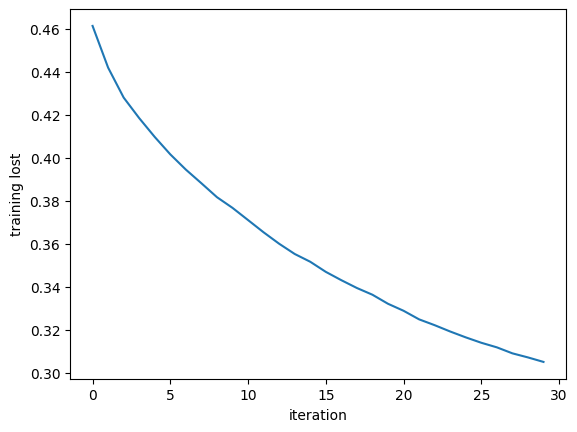

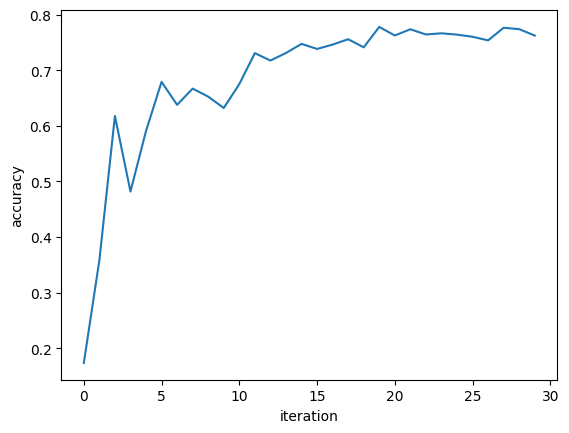

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_list, lost_list)
plt.ylabel('training lost')
plt.xlabel('iteration')
plt.show()

plt.plot(x_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.show()
